<a href="https://colab.research.google.com/github/PythonIndian/D4_66_DHLV/blob/main/D4_66_DL_Lab_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Devesh Ashish Vyas. \
Roll no: 66. Batch: D4. \
Subject: Deep Learning Lab. \
Date: 11/04/24. \
 Practical-08

**Auto-image-captioning on MNIST dataset using LeNet-5 Model**

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

x_train = x_train.reshape(-1, 28, 28, 1).astype(np.float32) / 255.0
x_val = x_val.reshape(-1, 28, 28, 1).astype(np.float32) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype(np.float32) / 255.0

# Define LeNet-5 architecture
model = models.Sequential([
    layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
844/844 [==============================] - 26s 29ms/step - loss: 0.2505 - accuracy: 0.9255 - val_loss: 0.0858 - val_accuracy: 0.9757
Epoch 2/10
844/844 [==============================] - 24s 28ms/step - loss: 0.0705 - accuracy: 0.9782 - val_loss: 0.0623 - val_accuracy: 0.9812
Epoch 3/10
844/844 [==============================] - 24s 28ms/step - loss: 0.0503 - accuracy: 0.9841 - val_loss: 0.0565 - val_accuracy: 0.9818
Epoch 4/10
844/844 [==============================] - 25s 29ms/step - loss: 0.0403 - accuracy: 0.9870 - val_loss: 0.0442 - val_accuracy: 0.9870
Epoch 5/10
844/844 [==============================] - 25s 29ms/step - loss: 0.0343 - accuracy: 0.9890 - val_loss: 0.0452 - val_accuracy: 0.9870
Epoch 6/10
844/844 [==============================] - 24s 29ms/step - loss: 0.0277 - accuracy: 0.9915 - val_loss: 0.0425 - val_accuracy: 0.9880
Epoch 7/10
844/844 [==============================] - 24s 29ms/step - l

**Visualize Training History**

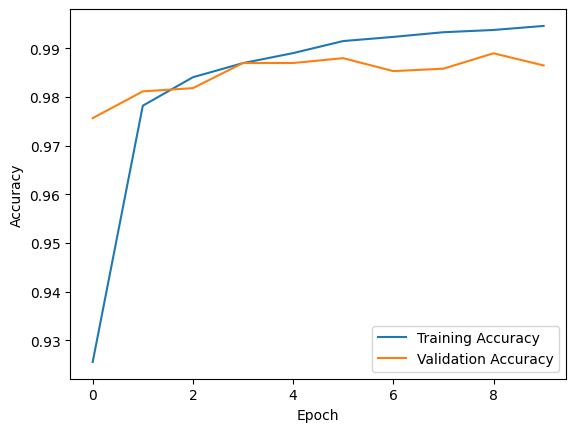

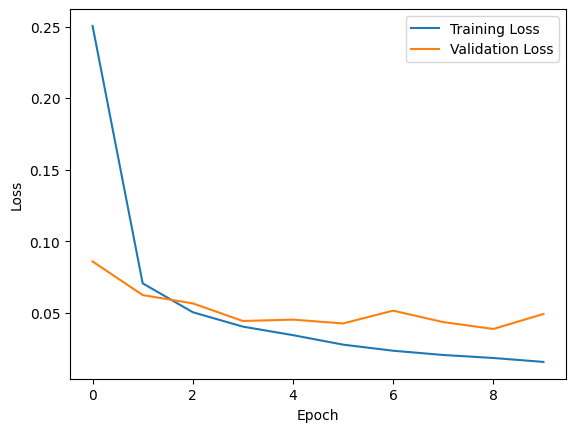

In [2]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


**Hyperparameter Training**

In [3]:
from tensorflow.keras.optimizers import Adam

# Define LeNet-5 architecture
model = models.Sequential([
    layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model with a custom learning rate
custom_optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=custom_optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with modified learning rate
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))


Epoch 1/10
844/844 [==============================] - 24s 27ms/step - loss: 0.2538 - accuracy: 0.9245 - val_loss: 0.0878 - val_accuracy: 0.9742
Epoch 2/10
844/844 [==============================] - 28s 33ms/step - loss: 0.0809 - accuracy: 0.9756 - val_loss: 0.0739 - val_accuracy: 0.9792
Epoch 3/10
844/844 [==============================] - 25s 29ms/step - loss: 0.0589 - accuracy: 0.9820 - val_loss: 0.0584 - val_accuracy: 0.9825
Epoch 4/10
844/844 [==============================] - 24s 29ms/step - loss: 0.0466 - accuracy: 0.9851 - val_loss: 0.0439 - val_accuracy: 0.9875
Epoch 5/10
844/844 [==============================] - 24s 28ms/step - loss: 0.0371 - accuracy: 0.9886 - val_loss: 0.0511 - val_accuracy: 0.9840
Epoch 6/10
844/844 [==============================] - 25s 30ms/step - loss: 0.0308 - accuracy: 0.9903 - val_loss: 0.0452 - val_accuracy: 0.9887
Epoch 7/10
844/844 [==============================] - 24s 28ms/step - loss: 0.0277 - accuracy: 0.9909 - val_loss: 0.0475 - val_accuracy:

**Data Augmentation**

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)

datagen.fit(x_train)

# Train the model with augmented data
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    steps_per_epoch=len(x_train) / 64,
                    epochs=10,
                    validation_data=(x_val, y_val))


Epoch 1/10
843/843 [==============================] - 41s 47ms/step - loss: 0.1317 - accuracy: 0.9599 - val_loss: 0.0452 - val_accuracy: 0.9867
Epoch 2/10
843/843 [==============================] - 42s 50ms/step - loss: 0.0793 - accuracy: 0.9752 - val_loss: 0.0482 - val_accuracy: 0.9857
Epoch 3/10
843/843 [==============================] - 40s 48ms/step - loss: 0.0691 - accuracy: 0.9782 - val_loss: 0.0326 - val_accuracy: 0.9905
Epoch 4/10
843/843 [==============================] - 40s 48ms/step - loss: 0.0633 - accuracy: 0.9802 - val_loss: 0.0280 - val_accuracy: 0.9910
Epoch 5/10
843/843 [==============================] - 40s 48ms/step - loss: 0.0578 - accuracy: 0.9824 - val_loss: 0.0407 - val_accuracy: 0.9888
Epoch 6/10
843/843 [==============================] - 40s 48ms/step - loss: 0.0552 - accuracy: 0.9826 - val_loss: 0.0452 - val_accuracy: 0.9878
Epoch 7/10
843/843 [==============================] - 43s 51ms/step - loss: 0.0524 - accuracy: 0.9840 - val_loss: 0.0332 - val_accuracy:

**Model Evaluation**

In [5]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


313/313 [==============================] - 2s 7ms/step - loss: 0.0250 - accuracy: 0.9910
Test accuracy: 0.9909999966621399


**Deployment & Model Interpretation**

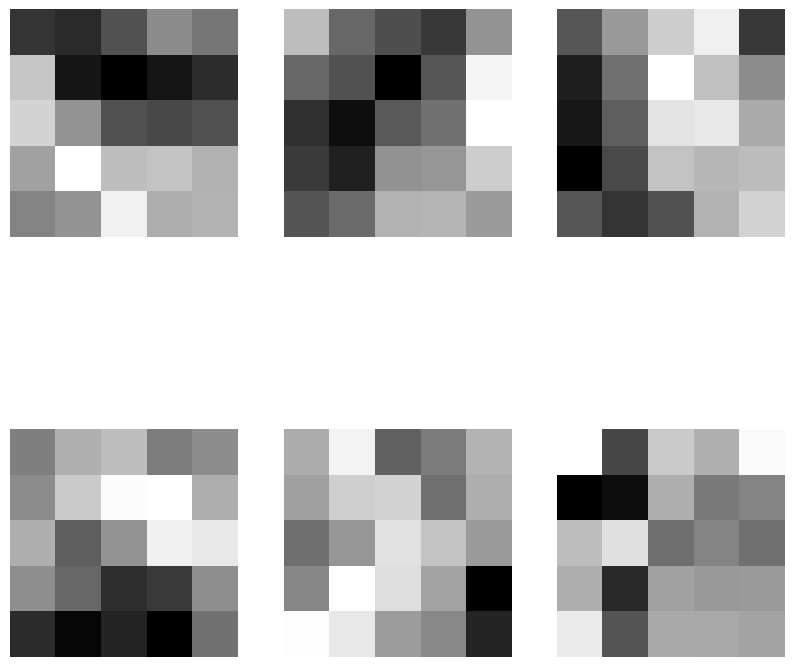

In [7]:
conv1_weights = model.layers[0].get_weights()[0]
plt.figure(figsize=(10, 10))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(conv1_weights[:, :, 0, i], cmap='gray')
    plt.axis('off')
plt.show()
